<a href="https://colab.research.google.com/github/sepse/Global-Renewable-Energy/blob/main/Global_Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Renewable Energy Overview

With climate change being a serious topic, it is necessary to be informed on where does our energy come from. By looking at global suppliers in general, and local ones in particular, we can get a better overview on the topic. 


In [ ]:
!pip install plotly_express
!pip install geopandas
!pip install cartopy

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import geopandas as gpd
import plotly.graph_objects as go
%matplotlib inline



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 32.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 77.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.8 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102754 sha256=7137d38ddbf506ebc8170fb7ca4037d4f148a005f8a129f5f4ada6b1250c7a20


We start by loading the dataset into the notebook.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Global Energy Analysis/global_powerplants.csv')

# Global Capacity in Energy Creation

In [ ]:
df0_1=pd.DataFrame(df.groupby('country code')['capacity in MW'].sum())
fig = px.choropleth(df0_1,locations=df0_1.index,color='capacity in MW',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,1500000),title='World Energy Capacity in MW',height=700
    )
fig.show()

In [ ]:
df0_2=pd.DataFrame(df.groupby('country code')['estimated_generation_gwh_2020'].sum())
fig = px.choropleth(df0_2,locations=df0_2.index,color='estimated_generation_gwh_2020',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,7000000),title='World Energy estimated_generation_gwh_2020',height=700
    )
fig.show()

# What is Renewable Energy

Renewable energy comes from sources or processes that are constantly replenished. These sources of energy include solar energy, wind energy, geothermal energy, and hydroelectric power.

Renewable sources are often associated with green energy and clean energy, but there are some subtle differences between these three energy types. Where renewable sources are those that are recyclable, clean energy are those that do not release pollutants like carbon dioxide, and green energy is that which comes from natural sources. While there is often cross-over between these energy types, not all types of renewable energy are actually fully clean or green. For example, some hydroelectric sources can actually damage natural habitats and cause deforestation.

Types
* Solar Power
* Wind Power
* Hydroelectric Power
* Biomass Energy
* Geothermal
* Tidal Power



Benefit

Renewable energy offers a range of benefits including offering a freely available source of energy generation. As the sector grows there has also been a surge in job creation to develop and install the renewable energy solutions of tomorrow. Renewable sources also offer greater energy access in developing nations and can reduce energy bills too.

Of course, one of the largest benefits of renewable energy is that much of it also counts as green and clean energy. This has created a growth in renewable energy, with wind and solar being particularly prevalent.

However, these green benefits are not the sole preserve of renewable energy sources. Nuclear power is also a zero-carbon energy source, since it generates or emits very low levels of CO2. Some favour nuclear energy over resources such as solar and wind, since nuclear power is a stable source that is not reliant on weather conditions. Which brings us onto some of the disadvantages of renewable energy…

source and reference  https://www.twi-global.com/technical-knowledge/faqs/renewable-energy

We begin by generating a dataset.

In [ ]:
df['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In these values, renewable energies are 'Hydro', 'Solar', 'Wind', 'Waste','Biomass','Wave and Tidal' ,'Petcoke','Geothermal', 'Storage' and 'Cogeneration'

In [ ]:
df_re=df.query('primary_fuel in ["Hydro", "Solar", "Wind","Waste", "Biomass", "Wave and Tidal", "Petcoke", "Geothermal","Storage", "Cogeneration"]')
df_re.head()

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,350.80


# Global Renewable Energy Capacity Map

In [ ]:
df1=pd.DataFrame(df_re.groupby('country code')['capacity in MW'].sum())

In [ ]:
fig = px.choropleth(df1,locations=df1.index,color='capacity in MW',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,400000),title='World Renewable Energy Capacity in MW',height=700
    )
fig.show()

As the map indicates, China, US, Brasil, Canada and India have a lot of renewable energy capacity.

# Global Renewable Energy Estimated_Generation_gwh_2020 Map

In [ ]:
df2=pd.DataFrame(df_re.groupby('country code')['estimated_generation_gwh_2020'].sum())

In [ ]:
fig = px.choropleth(df2,locations=df1.index,color='estimated_generation_gwh_2020',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,1100000),title='World Renewable Energy estimated_generation_gwh_2020',height=500
    )
fig.show()

China, US, Brasil, Canada and India are also creating a lot of renewable energy.

# Barchart of Global Capacity in MW
In order to get a better perspective, we will plot a barchart of global capacity.

<Axes: ylabel='primary_fuel'>

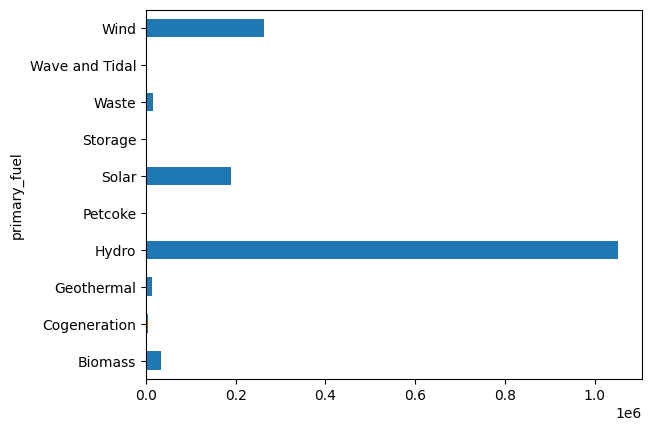

In [ ]:
df_re.groupby('primary_fuel')['capacity in MW'].sum().plot.barh()

# Barchart of Global Generation_gwh_2020
The barchart below indicates the amount generated for the year 2020

<Axes: ylabel='primary_fuel'>

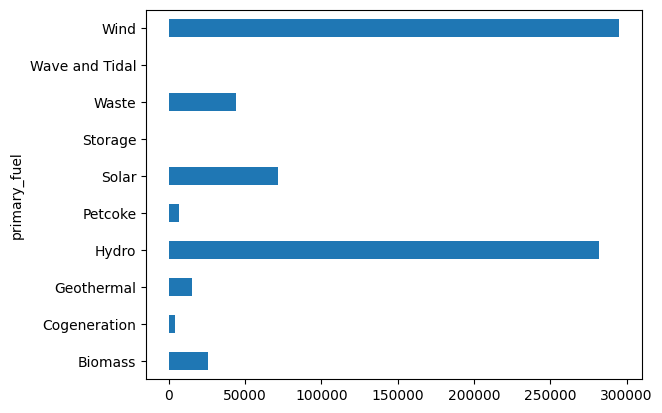

In [ ]:
df_re.groupby('primary_fuel')['generation_gwh_2020'].sum().plot.barh()

# Wind Power Plants

Clearly Wind and Hydro are leading sources of renewable energy; we can further focus on the specific producers in the Wind subcategory to get a more detailed look.

In [ ]:
df_re_wind=df_re.query('primary_fuel in ["Wind"]')
df_re_wind.head()

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
91,ATA,Antarctica,Ross Island,1.00,-77.8428,166.7271,Wind,NaN,NaN,NaN,NaN,Meridian Energy,WRI,NaN,NaN,NaN
139,ARG,Argentina,COMODORO RIVADAVIA - ANTONIO MORAN,16.56,-45.8467,-67.4964,Wind,NaN,NaN,NaN,NaN,COOPERATIVA,Ministerio de Energía y Minería,NaN,NaN,104.06
238,ARG,Argentina,GENERAL ACHA,1.80,-37.4309,-64.7160,Wind,NaN,NaN,NaN,NaN,COOPERATIVA,Ministerio de Energía y Minería,NaN,NaN,11.31
264,ARG,Argentina,MAYOR BURATOVICH,2.02,-39.2291,-62.6497,Wind,Oil,NaN,NaN,NaN,COOPERATIVAS,Ministerio de Energía y Minería,NaN,NaN,12.69
278,ARG,Argentina,PARQUE EOLICO ARAUCO SAPEM I,25.20,-28.6684,-66.7524,Wind,NaN,NaN,NaN,NaN,PARQUE EOLICO ARAUCO S.A.,Ministerio de Energía y Minería,NaN,NaN,158.35


In [ ]:
fig = px.scatter_geo(df_re_wind,
                    lat=df_re_wind.latitude,
                    lon=df_re_wind.longitude,
                    hover_name="name of powerplant")
fig.show()

<Axes: xlabel='country'>

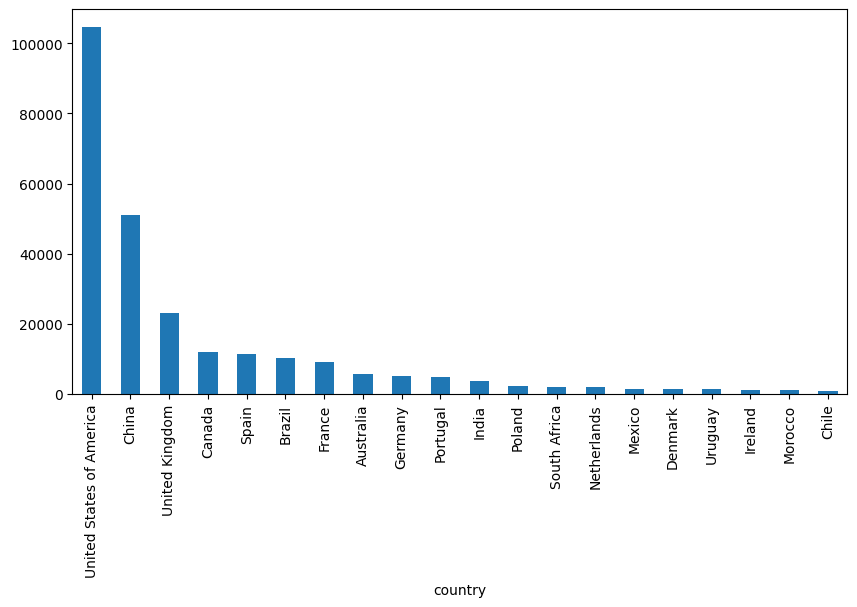

In [ ]:
df_re_wind.groupby('country')['capacity in MW'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(10,5))

# Hydro Power Plants
Here we focus on the Hydro power plants.

In [ ]:
df_re_hydro=df_re.query('primary_fuel in ["Hydro"]')
df_re_hydro.head()

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,119.50
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,350.80
5,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,46.12
7,AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,6.00,35.9416,68.7100,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,19.74


In [ ]:
fig = px.scatter_geo(df_re_hydro,
                    lat=df_re_hydro.latitude,
                    lon=df_re_hydro.longitude,
                    hover_name="name of powerplant")
fig.show()

<Axes: xlabel='country'>

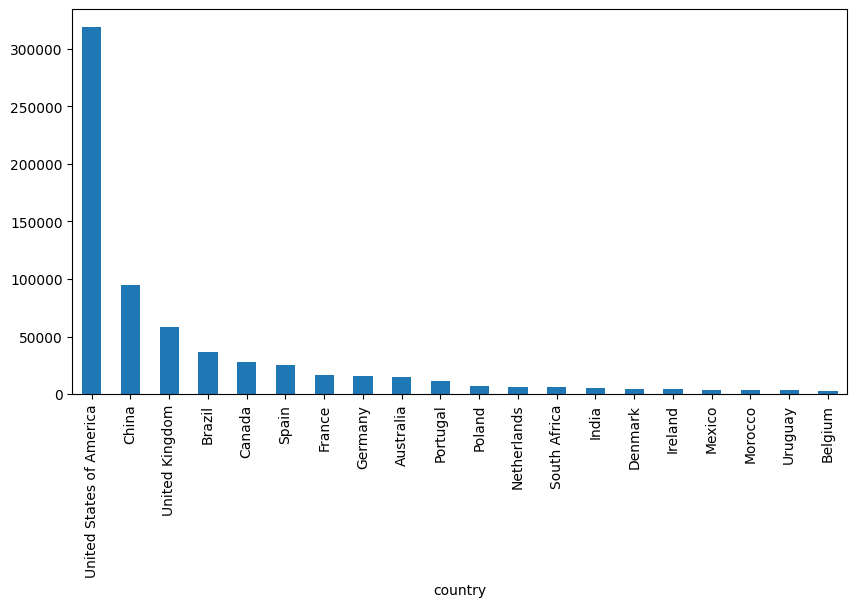

In [ ]:
df_re_wind.groupby('country')['estimated_generation_gwh_2020'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(10,5))

# Balkan Overview

After getting a global perspective, we will delve deeper in the Balkans to get a sense on where the region stands on the renewable energy.

In [ ]:
df_bcountry=df.query('country in ["Serbia","Albania","Croatia","Montenegro", "Kosovo", "Macedonia", "Bosnia and Herzegovina", "Bulgaria"]')
df_bcountry.sample(10)

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
3555,BGR,Bulgaria,Vratsa N,5.0,43.2466,23.5397,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,7.82
3544,BGR,Bulgaria,Pobeda,50.6,43.5190,24.5460,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,82.46
1148,BIH,Bosnia and Herzegovina,Ugljevik CHP Coal Power Plant Bosnia and Herze...,300.0,44.6829,18.9671,Coal,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,1805.76
12,ALB,Albania,Lanabregas,5.0,41.3428,19.8964,Hydro,NaN,NaN,NaN,1951.0,NaN,GEODB,NaN,NaN,15.23
17174,MKD,Macedonia,Vrutok Hydroelectric Power Plant Macedonia,150.0,41.7707,20.8377,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,276.84
17573,MNE,Montenegro,Piva (Mratinje) Hydroelectric Power Plant Mont...,360.0,43.2725,18.8422,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,JRC-PPDB-OPEN,200.37
3521,BGR,Bulgaria,Chervenako,4.0,42.6320,26.0370,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,5.95
9400,HRV,Croatia,Zakucac Hydroelectric Power Plant Croatia,522.0,43.4581,16.7027,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,1791.17
3539,BGR,Bulgaria,Montan-Renar,7.0,44.1070,27.1740,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,11.30
3538,BGR,Bulgaria,Mokresh,4.1,43.7491,23.3858,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,6.04


1) Renewable Energy % of Balkan countries
* Capacity in MW

<Axes: ylabel='country'>

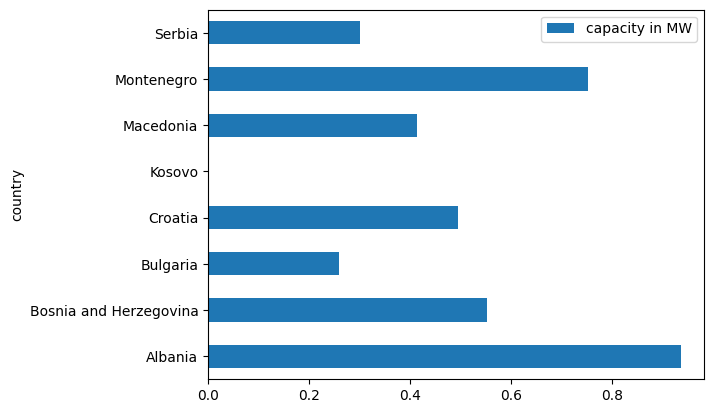

In [ ]:
df_bcountry_re=df_bcountry.query('primary_fuel in ["Hydro", "Solar", "Wind","Waste", "Biomass", "Wave and Tidal", "Petcoke", "Geothermal","Storage", "Cogeneration"]')
df_compare=pd.DataFrame(df_bcountry_re.groupby('country')['capacity in MW'].sum()/df_bcountry.groupby('country')['capacity in MW'].sum())
df_compare.plot.barh()

Albania is highest in the Balkan countries in % of capacity of renewable energy.

* Estimated Generation gwh in 2020

<Axes: ylabel='country'>

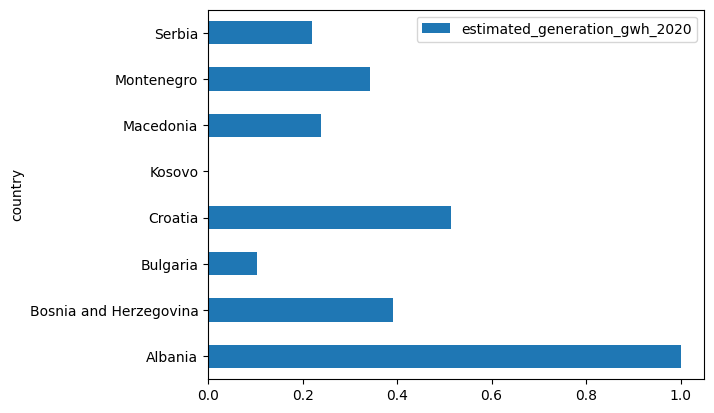

In [ ]:
df_bcountry_re=df_bcountry.query('primary_fuel in ["Hydro", "Solar", "Wind","Waste", "Biomass", "Wave and Tidal", "Petcoke", "Geothermal","Storage", "Cogeneration"]')
df_compare2=pd.DataFrame(df_bcountry_re.groupby('country')['estimated_generation_gwh_2020'].sum()/df_bcountry.groupby('country')['estimated_generation_gwh_2020'].sum())
df_compare2.plot.barh()

Albania is highest in Balkan countries in % of renewable energy in Estimated Generation gwh in 2020 .


But where can we find renewable energy plants in Balkans? We should take a closer look and see what the data tells us.

In [ ]:
df_re_balkan=df_re.query('country in ["Albania", "Kosovo", "Montenegro", "Serbia", "Croatia", "Bosnia and Herzegovina", "Macedonia", "Bulgaria"]')
df_re_balkan.sample(10)

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
3543,BGR,Bulgaria,Palauzovo,5.0,42.5160,26.7550,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,7.93
3525,BGR,Bulgaria,Hanovo,4.5,42.3960,26.5260,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,6.86
3554,BGR,Bulgaria,Vratsa,18.0,43.2420,23.5440,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,28.24
9382,HRV,Croatia,Jaruga Hydroelectric Power Plant Croatia Croatia,7.2,43.8050,15.9626,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,21.06
12,ALB,Albania,Lanabregas,5.0,41.3428,19.8964,Hydro,NaN,NaN,NaN,1951.0,NaN,GEODB,NaN,NaN,15.23
9,ALB,Albania,Bistrica 1,27.0,39.9116,20.1047,Hydro,NaN,NaN,NaN,1965.0,NaN,GEODB,NaN,NaN,88.45
9389,HRV,Croatia,Ozalj Hydroelectric Power Plant Croatia Croatia,5.5,45.6143,15.4778,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,21.78
14,ALB,Albania,Ulez,25.0,41.6796,19.8936,Hydro,NaN,NaN,NaN,1958.0,NaN,GEODB,NaN,NaN,87.06
3526,BGR,Bulgaria,IVAILOVGRAD,114.0,41.5839,26.1075,Hydro,NaN,NaN,NaN,NaN,NaN,WRI,NaN,NaN,196.91
1135,BIH,Bosnia and Herzegovina,Jablanica Hydroelectric Power Plant Bosnia and...,180.0,43.6924,17.7325,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,568.95


# Mapping Balkan Renewable Power Plants

We plot the individual plants on the map, using 'Folium' python library, where the plats are represented as popups; by clicking in them we get additional information.

In [ ]:
import folium

m = folium.Map(location = [42.617, 20.769], tiles ='OpenStreetMap',  
    zoom_start=7)
for i, row in df_re_balkan.iterrows():
    lat = df_re_balkan.at[i, 'latitude']
    lng = df_re_balkan.at[i, 'longitude']
    popup = 'Fuel : ' + str(df.at[i, 'primary_fuel']) + '<br>' + '<br>' +'Plant: ' + df.at[i, 'name of powerplant']

    folium.Marker(location = [lat, lng], popup= popup, icon =   
                               folium.Icon(color='blue')).add_to(m)

m     


As the map indicates renewable power plants are present in almost all balkan countries; though in comparison to the broader region the generating capacities are relatively low, perhaps because of the presence of still operational fossil fuel plants.